In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"]=(12,6)

In [36]:
#Carregando dados
df = pd.read_csv("../data/processed/magalu_phones_clean.csv")


In [37]:
display(df.head())
print(df.info())
print(df.describe())

,title,price,marcas
0,Smartphone Motorola Moto G15 256GB Verde 4G 6G...,2249.1,Motorola
1,"Smartphone Samsung Galaxy A15 6,5"" 128GB Azul ...",691.2,Samsung
2,"Apple iPhone 15 128GB Azul 6,1"" 48MP iOS 5G",691.2,Apple
3,"Smartphone Motorola Moto g24 Power 128GB, 4GB ...",1619.1,Motorola
4,Smartphone Motorola Moto G34 128GB Azul 5G 4GB...,679.0,Motorola


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   147 non-null    object 
 1   price   147 non-null    float64
 2   marcas  147 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.6+ KB
None
              price
count    147.000000
mean    1749.338503
std     1576.464434
min      359.990000
25%      944.990000
50%     1349.000000
75%     1799.545000
max    10799.100000


In [38]:

# Remover as palavras "Smartphone" e "Celular" do título
df['title'] = df['title'].str.replace(r'\bSmartphone\b|\bCelular\b', '', regex=True, case=False)

# Remover espaços extras resultantes da remoção
df['title'] = df['title'].str.strip()


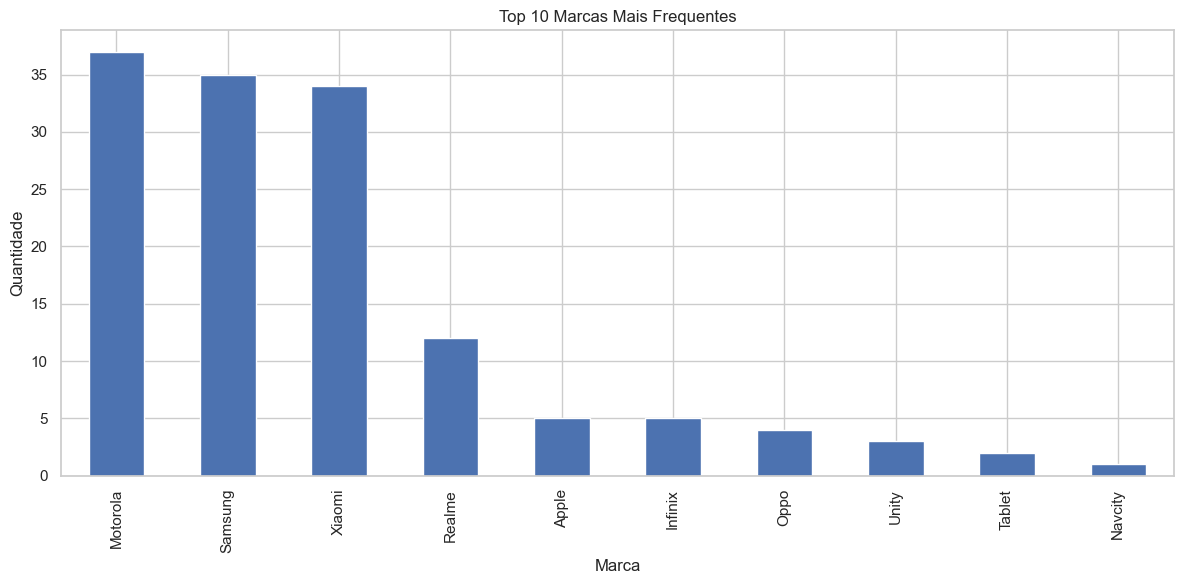

In [39]:

top_marcas = df['marcas'].value_counts().head(10)
top_marcas.plot(kind='bar', title='Top 10 Marcas Mais Frequentes')
plt.ylabel("Quantidade")
plt.xlabel("Marca")
plt.tight_layout()
plt.show()


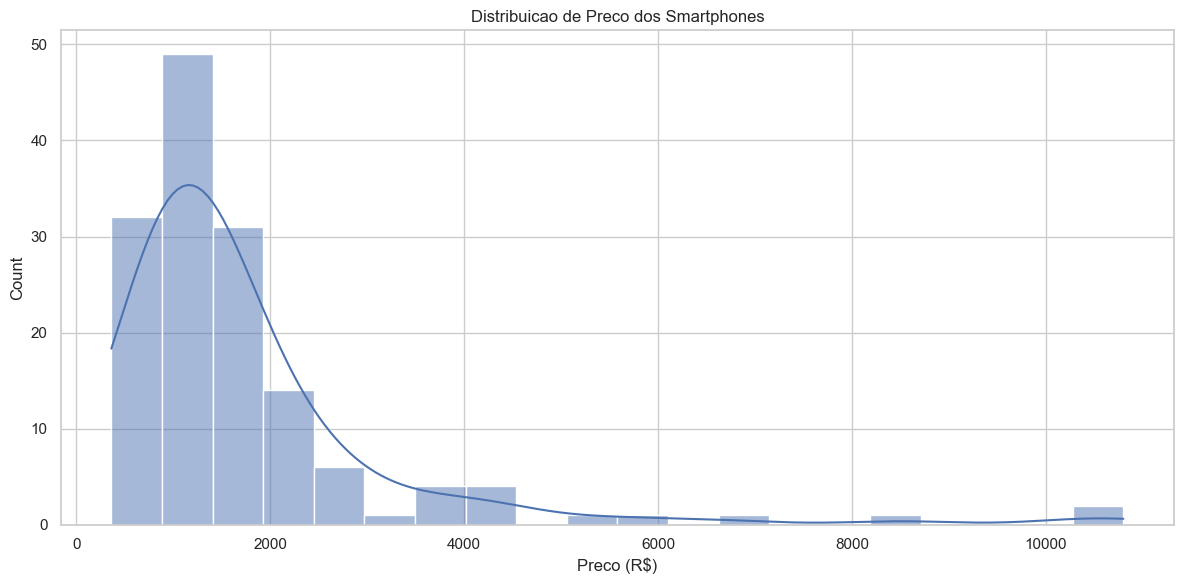

In [40]:
#distribuicao de precos
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Distribuicao de Preco dos Smartphones')
plt.xlabel('Preco (R$)')
plt.tight_layout()
plt.show()

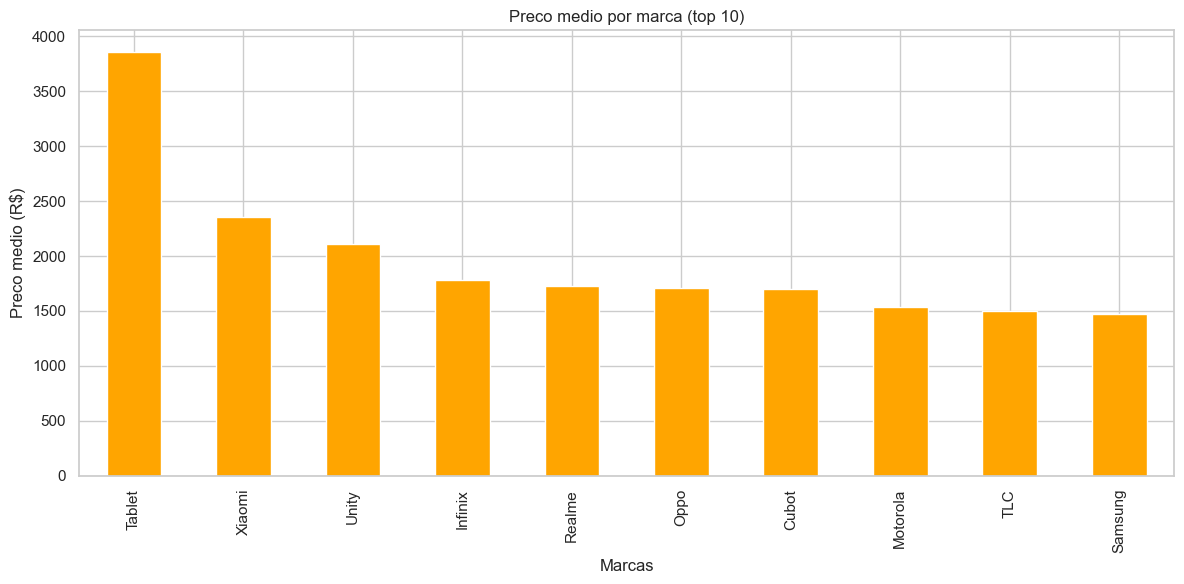

In [41]:
# Precos medio por marca
df_group = df.groupby('marcas')['price'].mean().sort_values(ascending=False).head(10)
df_group.plot(kind ='bar', color = 'orange', title='Preco medio por marca (top 10)')
plt.ylabel('Preco medio (R$)')
plt.xlabel('Marcas')
plt.tight_layout()
plt.show()